A matrix is a map (i.e., as a function) that trasforms vectors to new vectors.
Ax = y, A =( (2, 1), (-1, 1) ), x = (1, 3), y = (5, 2)

One way to understand is that A:
First rotates x by some angle θ and
Then scale it by some scalar γ to obtain the image y of x

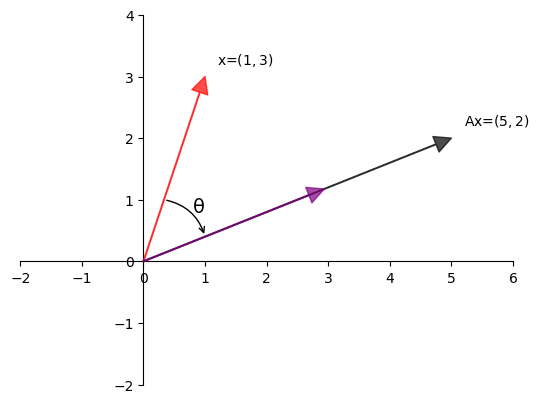

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import matrix_power
from matplotlib.lines import Line2D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

A = np.array([[2, 1],
             [-1, 1]])

from math import sqrt

fig, ax = plt.subplots()

# set the axes through the origin
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')

ax.set(xlim=(-2, 6), ylim=(-2, 4), aspect=1)

vecs = ((1, 3), (5, 2))
c = ['r', 'black']
for i, v in enumerate(vecs):
    ax.annotate('', xy=v, xytext=(0, 0),
               arrowprops=dict(color=c[i],
                               shrink=0,
                               alpha=0.7,
                               width=0.5))
    
ax.text(0.2 + 1, 0.2 + 3, 'x=$(1, 3)$')
ax.text(0.2 + 5, 0.2 + 2, 'Ax=$(5, 2)$')

ax.annotate('', xy=(sqrt(10/29)*5, sqrt(10/29)*2), xytext=(0, 0),
            arrowprops=dict(color='purple',
                            shrink=0,
                            alpha=0.7,
                            width=0.5))

ax.annotate('', xy=(1, 2/5), xytext=(1/3, 1),
            arrowprops={'arrowstyle': '->',
                        'connectionstyle': 'arc3, rad=-0.3'},
            horizontalalignment='center')
ax.text(0.8, 0.8, f'θ', fontsize=14)

plt.show()

Below we visualize transformation by thinking of vectors as points instead of arrows
We consider how a given matrix transfroms
a grid of pionts and
a set of points located on the unite circle

first we define two functions, called grid_transform and circle_transform

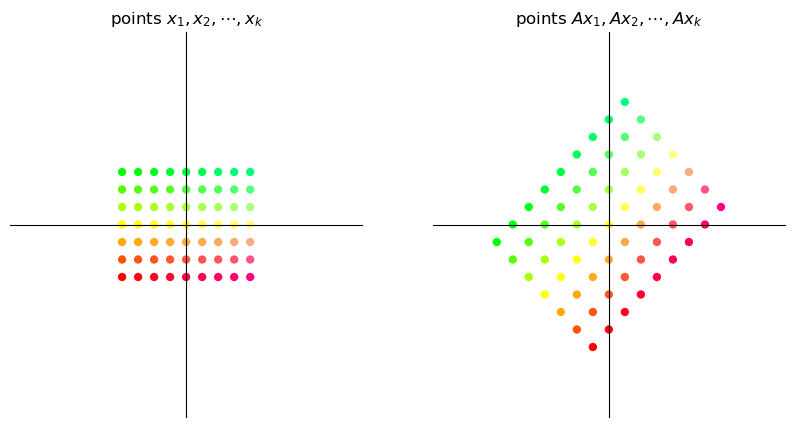

In [10]:
def colorizer(x, y):
    r = min(1, 1-y/3)
    g = min(1, 1+y/3)
    b = 1/4 + x/16
    return (r, g, b)

# Define function grid_transform. Pay attention to the indent.
def grid_transform(A = np.array( [[1, -1], [1, 1]] ) ):
    xvals = np.linspace(-4, 4, 9)
    yvals = np.linspace(-3, 3, 7)
    xygrid = np.column_stack([[x, y] for x in xvals for y in yvals])
    uvgrid = A @ xygrid
    
    colors = list(map(colorizer, xygrid[0], xygrid[1]))

    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    for axes in ax:
        axes.set(xlim=(-11, 11), ylim=(-11, 11))
        axes.set_xticks([])
        axes.set_yticks([])
        for spine in ['left', 'bottom']:
            axes.spines[spine].set_position('zero')
        for spine in ['right', 'top']:
            axes.spines[spine].set_color('none')
    
    # Plot x-y grids points
    ax[0].scatter(xygrid[0], xygrid[1], s=36, c=colors, edgecolor='none')
    # ax[0].grid(True)
    # ax[0].axis("equal")
    ax[0].set_title("points $x_1, x_2, \cdots, x_k$")

    # Plot transformed grid points
    ax[1].scatter(uvgrid[0], uvgrid[1], s=36, c=colors, edgecolor='none')
    # ax[1].grid(True)
    # ax[1].axis("equal")
    ax[1].set_title("points $Ax_1, Ax_2, \cdots, Ax_k$")

    plt.show()

grid_transform()

Define function circle_transform. Pay attention to indent.

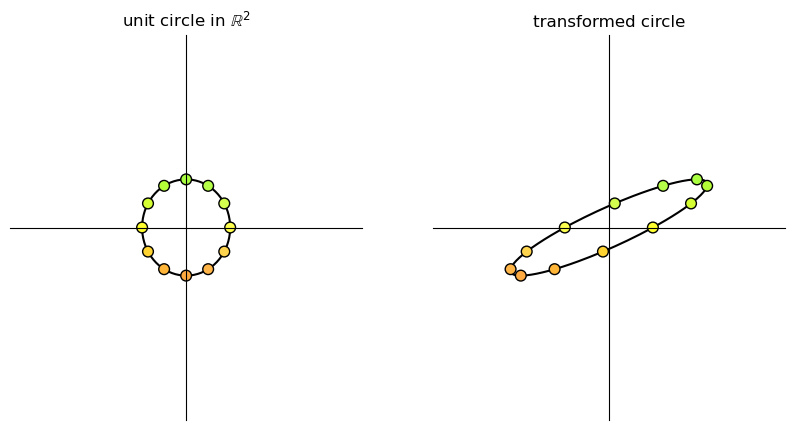

In [11]:
def colorizer(x, y):
    r = min(1, 1-y/3)
    g = min(1, 1+y/3)
    b = 1/4 + x/16
    return (r, g, b)

def circle_transform(A=np.array( [[-1, 2], [0, 1]] )):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    
    for axes in ax:
        axes.set(xlim=(-4, 4), ylim=(-4, 4))
        axes.set_xticks([])
        axes.set_yticks([])
        for spine in ['left', 'bottom']:
            axes.spines[spine].set_position('zero')
        for spine in ['right', 'top']:
            axes.spines[spine].set_color('none')
    
    θ = np.linspace(0, 2 * np.pi, 150)
    r = 1
    
    θ_1 = np.empty(12)
    for i in range(12):
        θ_1[i] = 2 * np.pi * (i/12)
    
    x = r * np.cos(θ)
    y = r * np.sin(θ)
    a = r * np.cos(θ_1)
    b = r * np.sin(θ_1)
    a_1 = a.reshape(1, -1) 
    # The '-1' dimesnsion means the value is inferred from the leghth of the array, which is 12 here, 
    # and remaining dimensions
    b_1 = b.reshape(1, -1) 
    
    colors = list(map(colorizer, a, b))
    ax[0].plot(x, y, color='black', zorder=1) # ?
    ax[0].scatter(a_1, b_1, c=colors, alpha=1, s=60, 
               edgecolors='black', zorder=2)
    ax[0].set_title("unit circle in $\mathbb{R}^2$")
    
    x1 = x.reshape(1, -1)
    y1 = y.reshape(1, -1)
    ab = np.concatenate( (a_1, b_1), axis=0)
    transformed_ab = A @ ab
    transformed_circle_input = np.concatenate( (x1, y1), axis=0)
    transformed_circle = A @ transformed_circle_input
    
    ax[1].plot(transformed_circle[0, :],
               transformed_circle[1, :], color='black', zorder=1)
    ax[1].scatter(transformed_ab[0, :],
               transformed_ab[1, :], color=colors, alpha=1, s=60, edgecolors='black',  zorder=2)
    ax[1].set_title("transformed circle")
    
    plt.show()

circle_transform()